In [42]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import matplotlib
import pandas_datareader as web
from scipy import stats

%matplotlib inline

In [43]:
gold_prices_df = Path('Gold - Pre Covid.xlsx')
silver_prices_df = Path('Silver - Pre Covid.xlsx')
platinum_prices_df = Path ('Platinum - Pre Covid.xlsx')
bitcoin_prices_df = Path ('Bitcoin - Pre Covid.xlsx')
ethereum_prices_df = Path('Ethereum - Pre-Covid.xlsx')


In [44]:
gold_prices = pd.read_excel(gold_prices_df, index_col='DATE', infer_datetime_format = True, parse_dates = True)
gold_prices = gold_prices.sort_index()
gold_prices.head()

,Closing Price (USD)
DATE,
2019-02-15,123.21
2019-02-16,NaN
2019-02-17,123.19
2019-02-18,123.37
2019-02-19,123.10


In [45]:
silver_prices = pd.read_excel(silver_prices_df, index_col='DATE', infer_datetime_format = True, parse_dates = True)
silver_prices = silver_prices.sort_index()
silver_prices.head()

,Closing Price (USD)
DATE,
2019-02-15,NaN
2019-02-16,14.35
2019-02-17,14.64
2019-02-18,NaN
2019-02-19,NaN


In [46]:
platinum_prices = pd.read_excel(platinum_prices_df, index_col='DATE', infer_datetime_format = True, parse_dates = True)
platinum_prices = platinum_prices.sort_index()
platinum_prices.head()

,Closing Price (USD)
DATE,
2019-02-15,NaN
2019-02-16,955.2
2019-02-17,948.3
2019-02-18,NaN
2019-02-19,NaN


In [47]:
bitcoin_prices = pd.read_excel(bitcoin_prices_df, index_col='DATE', infer_datetime_format = True, parse_dates = True)
bitcoin_prices = bitcoin_prices.sort_index()
bitcoin_prices.head()

,Closing Price (USD)
DATE,
2019-02-15,NaN
2019-02-16,3566.247765
2019-02-17,3596.405191
2019-02-18,3606.151988
2019-02-19,3865.318165


In [48]:
ethereum_prices = pd.read_excel(ethereum_prices_df, index_col='DATE', infer_datetime_format = True, parse_dates = True)
ethereum_prices = ethereum_prices.sort_index()
ethereum_prices.head()

,Closing Price (USD)
DATE,
2019-02-15,NaN
2019-02-16,120.285057
2019-02-17,122.279216
2019-02-18,132.091376
2019-02-19,142.617995


In [49]:
currency_portfolio_df = pd.concat([ethereum_prices, bitcoin_prices, silver_prices, gold_prices, platinum_prices], axis="columns", join="inner",)

currency_portfolio_df.columns = ['ETH','BTC','SLV','GLD','PLT']
currency_portfolio_df.head(10)


,ETH,BTC,SLV,GLD,PLT
DATE,,,,,
2019-02-15,NaN,NaN,NaN,123.21,NaN
2019-02-16,120.285057,3566.247765,14.35,NaN,955.2
2019-02-17,122.279216,3596.405191,14.64,123.19,948.3
2019-02-18,132.091376,3606.151988,NaN,123.37,NaN
2019-02-19,142.617995,3865.318165,NaN,123.10,NaN
2019-02-20,144.160667,3904.482920,14.61,122.49,939.7
2019-02-21,145.548254,3924.739844,14.56,122.37,946.1
2019-02-22,142.869989,3889.758485,14.53,122.85,937.4
2019-02-23,146.665801,3933.607590,14.46,122.92,952.7


In [50]:
# Save the last day's closing price
ETH_last_price = currency_portfolio_df['ETH'][-1]
BTC_last_price = currency_portfolio_df['BTC'][-1]
SLV_last_price = currency_portfolio_df['SLV'][-1]
GLD_last_price = currency_portfolio_df['GLD'][-1]
PLT_last_price = currency_portfolio_df['PLT'][-1]

ETH_last_price
BTC_last_price
SLV_last_price
GLD_last_price
PLT_last_price

777.0

In [51]:
# Daily ROI for Stocks
daily_returns_currency = currency_portfolio_df.pct_change()
daily_returns_currency.head(10)

,ETH,BTC,SLV,GLD,PLT
DATE,,,,,
2019-02-15,NaN,NaN,NaN,NaN,NaN
2019-02-16,NaN,NaN,NaN,0.000000,NaN
2019-02-17,0.016579,0.008456,0.020209,-0.000162,-0.007224
2019-02-18,0.080244,0.002710,0.000000,0.001461,0.000000
2019-02-19,0.079692,0.071868,0.000000,-0.002189,0.000000
2019-02-20,0.010817,0.010132,-0.002049,-0.004955,-0.009069
2019-02-21,0.009625,0.005188,-0.003422,-0.000980,0.006811
2019-02-22,-0.018401,-0.008913,-0.002060,0.003923,-0.009196
2019-02-23,0.026568,0.011273,-0.004818,0.000570,0.016322


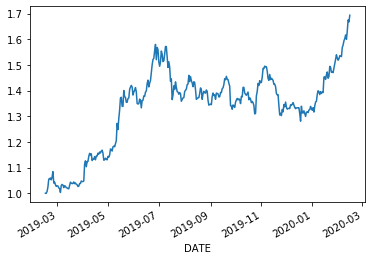

In [52]:
daily_returns_currency_cumulative_returns = pd.DataFrame

# Set the portfolio weights
currency_returns_weights = (0.2,0.2,0.2,0.2,0.2)

#use the dot function with the weights to multiply weights with each column'simulation
df_currency_portfolio=daily_returns_currency.dot(currency_returns_weights)

#Calculate the normalized, cumulative return series
daily_returns_currency_cumulative_returns=(1+df_currency_portfolio.fillna(0)).cumprod()

# Print records for the Dataframe
daily_returns_currency_cumulative_returns.plot()

In [53]:
# Calculate volatility

std_dev_daily_return = daily_returns_currency.std()
std_dev_daily_return

ETH    0.039420
BTC    0.035320
SLV    0.009554
GLD    0.010853
PLT    0.011325
dtype: float64

In [54]:
avg_daily_return = daily_returns_currency.mean()
avg_daily_return

ETH    0.002877
BTC    0.003311
SLV    0.000579
GLD    0.001207
PLT   -0.000480
dtype: float64

In [55]:
# Setup the Monte Carlo Parameters
number_simulations = 1000
number_records = 107
monte_carlo = pd.DataFrame()

In [56]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):

    print(f"Running Simulation {x}...")
    
    ETH_prices = [ETH_last_price]
    BTC_prices = [BTC_last_price]
    SLV_prices = [SLV_last_price]
    GLD_prices = [GLD_last_price]
    PLT_prices = [PLT_last_price]

    

    for n in range(number_records):
        
        simulated_prices = ETH_prices[-1] * (1 + np.random.normal(avg_daily_return['ETH'], std_dev_daily_return['ETH']))
        ETH_prices.append(simulated_prices)
    
        simulated_prices = BTC_prices[-1] * (1 + np.random.normal(avg_daily_return['BTC'], std_dev_daily_return['BTC']))
        BTC_prices.append(simulated_prices)
        
        simulated_prices = SLV_prices[-1] * (1 + np.random.normal(avg_daily_return['SLV'], std_dev_daily_return['SLV']))
        SLV_prices.append(simulated_prices)
        
        simulated_prices = GLD_prices[-1] * (1 + np.random.normal(avg_daily_return['GLD'], std_dev_daily_return['GLD']))
        GLD_prices.append(simulated_prices)
        
        simulated_prices = PLT_prices[-1] * (1 + np.random.normal(avg_daily_return['PLT'], std_dev_daily_return['PLT']))
        PLT_prices.append(simulated_prices)
    
   # Create a DataFrame of the simulated prices  
    portfolio = pd.DataFrame({
        "ETH Simulated Prices": ETH_prices,
        "BTC Simulated Prices": BTC_prices,
        "SLV Simulated Prices": SLV_prices,
        "GLD Simulated Prices": GLD_prices,
        "PLT Simulated Prices": PLT_prices,
    })
    
    
    portfolio_returns=portfolio.pct_change()   
    
    weights = [0.20, 0.20, 0.20, 0.20, 0.20]
    
    
    weighted_portfolio_returns = portfolio_returns.dot(weights) 
    
    monte_carlo[x] = (1+ weighted_portfolio_returns.fillna(0)).cumprod()

Running Simulation 0...
Running Simulation 1...
Running Simulation 2...
Running Simulation 3...
Running Simulation 4...
Running Simulation 5...
Running Simulation 6...
Running Simulation 7...
Running Simulation 8...
Running Simulation 9...
Running Simulation 10...
Running Simulation 11...
Running Simulation 12...
Running Simulation 13...
Running Simulation 14...
Running Simulation 15...
Running Simulation 16...
Running Simulation 17...
Running Simulation 18...
Running Simulation 19...
Running Simulation 20...
Running Simulation 21...
Running Simulation 22...
Running Simulation 23...
Running Simulation 24...
Running Simulation 25...
Running Simulation 26...
Running Simulation 27...
Running Simulation 28...
Running Simulation 29...
Running Simulation 30...
Running Simulation 31...
Running Simulation 32...
Running Simulation 33...
Running Simulation 34...
Running Simulation 35...
Running Simulation 36...
Running Simulation 37...
Running Simulation 38...
Running Simulation 39...
Running Si

In [57]:
# Check that the simulation ran successfully
monte_carlo.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996750,0.980970,1.003955,1.012978,1.024540,0.989469,1.029968,0.996966,0.987945,0.971749,...,1.002294,1.020197,0.985114,1.002034,1.005859,0.987779,1.002952,1.022782,0.996677,0.995689
2,1.013145,0.981219,0.998380,0.993003,1.024094,0.988004,1.022818,0.984255,0.983326,0.946757,...,0.992207,1.015439,0.996055,0.987095,0.991899,1.002355,0.980952,1.022100,0.985341,1.001577
3,1.030719,0.990040,1.014667,0.968676,1.032220,1.002037,1.026252,0.963612,0.971552,0.942884,...,1.003393,1.014768,1.008224,0.973955,1.002721,1.039314,0.974973,1.049370,1.001159,0.978965
4,1.036779,0.998708,1.037226,0.977865,1.041743,0.990000,1.017078,0.951923,0.952792,0.926568,...,0.995473,1.015865,1.026939,0.969925,0.983472,1.022451,0.961143,1.066365,1.009294,0.984865


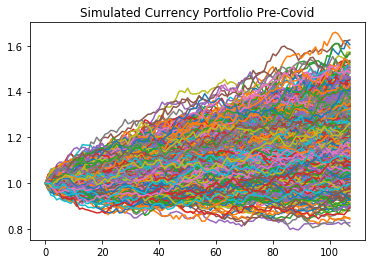

In [58]:
# Visualize the Simulation

monte_carlo.plot(legend=None, title = "Simulated Currency Portfolio Pre-Covid")

In [59]:
monte_carlo.to_csv(r'Pre_Covid_Monte_Carlo.csv',index = False)

In [60]:
# Select the last row for the cumulative returns
ending_returns = monte_carlo.iloc[-1, :]

In [61]:
# Select the last row for the cumulative returns 
ending_returns = monte_carlo.tail(1).T
ending_returns.head()

,107
0,1.111765
1,1.176847
2,1.190611
3,1.239376
4,1.263538


In [62]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_returns.quantile(q=[0.05, 0.95], numeric_only=True)
confidence_interval

,107
0.05,0.972197
0.95,1.419730


<Figure size 432x288 with 0 Axes>

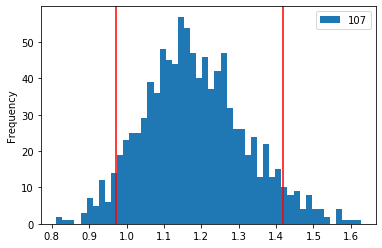

In [63]:
# Visualize the distribution of the ending returns
plt.figure();
ending_returns.plot.hist(bins=50)
plt.axvline(confidence_interval.iloc[0, 0], color="r")
plt.axvline(confidence_interval.iloc[1, 0], color="r")

# I am 90% confident that this portfolio's cumulative returns will fall within these bounds

In [64]:
# Compute cumulative returns
ending_returns.quantile([.01, .5, .9])

,107
0.01,0.899088
0.50,1.172531
0.90,1.370401


In [65]:
# Set initial investment
initial_investment = 40000

# Compute expected portfolio return
initial_investment * ending_returns.quantile([.01, .5, .9])

,107
0.01,35963.509969
0.50,46901.259594
0.90,54816.054060


In [66]:
# Re-calculate the retirement income with a 50% increase in the initial investment amount
.04 * (1.5 * initial_investment * ending_returns.quantile(.1)).iloc[0]

2430.1632709939236

In [67]:
# Compute projected returns
projected_returns = monte_carlo.quantile(q=[0.05, .5, .95], axis=1, numeric_only=True).T

# Display sample data
projected_returns.head()

,0.05,0.50,0.95
0,1.000000,1.000000,1.000000
1,0.982081,1.001433,1.022133
2,0.978121,1.001816,1.031051
3,0.974242,1.004314,1.039332
4,0.971574,1.006938,1.042207


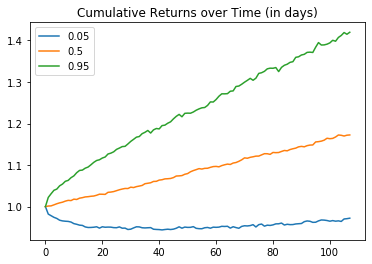

In [68]:
# Plot the cumulative returns over time
projected_returns.plot(title="Cumulative Returns over Time (in days)")

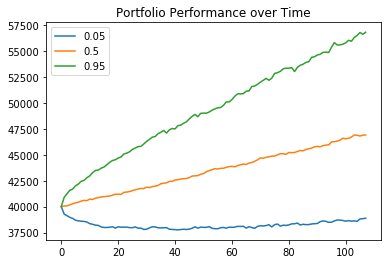

In [69]:
# Compute portfolio performance over time
projected_performance = (initial_investment * projected_returns)

# Plot projected performance over time
projected_performance.plot(title="Portfolio Performance over Time")

In [70]:
#Read sp500 returns
sp500_history_csv = Path('sp500_history.csv')
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()

#Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$','')
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history.dtypes

#Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

#Rename Column
sp500_returns.rename(columns={'Close' : 'S&P 500'}, inplace=True)
sp500_returns.head(5)

,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [71]:
#Combine the Currency Portfolio, and S&P 500 Returns in order to evaluate pre covid performance
sp500_currency_portfolio = pd.concat([daily_returns_currency, sp500_returns], axis='columns', join='inner')

In [72]:
sp500_currency_portfolio.head(10)

,ETH,BTC,SLV,GLD,PLT,S&P 500
2019-02-15,NaN,NaN,NaN,NaN,NaN,0.010879
2019-02-19,0.079692,0.071868,0.000000,-0.002189,0.000000,0.001499
2019-02-20,0.010817,0.010132,-0.002049,-0.004955,-0.009069,0.001777
2019-02-21,0.009625,0.005188,-0.003422,-0.000980,0.006811,-0.003526
2019-02-22,-0.018401,-0.008913,-0.002060,0.003923,-0.009196,0.006411
2019-02-25,-0.122786,-0.083187,0.000000,0.001221,0.000000,0.001232
2019-02-26,0.001983,0.014944,0.000000,0.001788,0.000000,-0.000790
2019-02-27,-0.016617,-0.005834,-0.016760,-0.003327,-0.005688,-0.000544
2019-02-28,-0.030025,-0.006490,-0.007812,0.003013,0.007733,-0.002826
2019-03-01,0.023960,0.007088,-0.005011,0.001542,-0.015347,0.006895


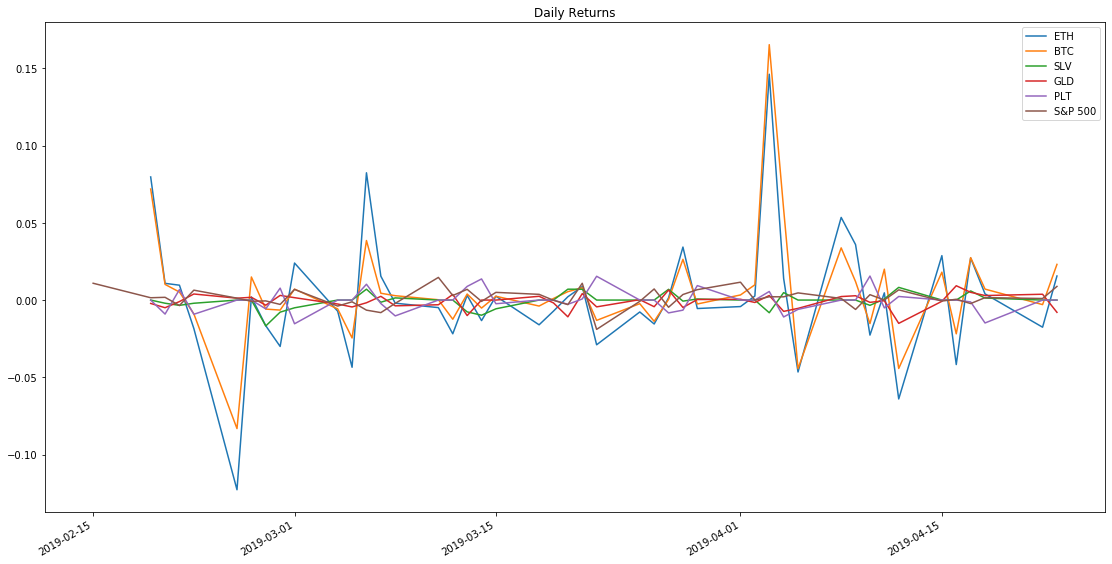

In [73]:
#Calculate and Plot the daily returns and cumulative returns
sp500_currency_portfolio.plot(figsize=(19,10),title='Daily Returns')

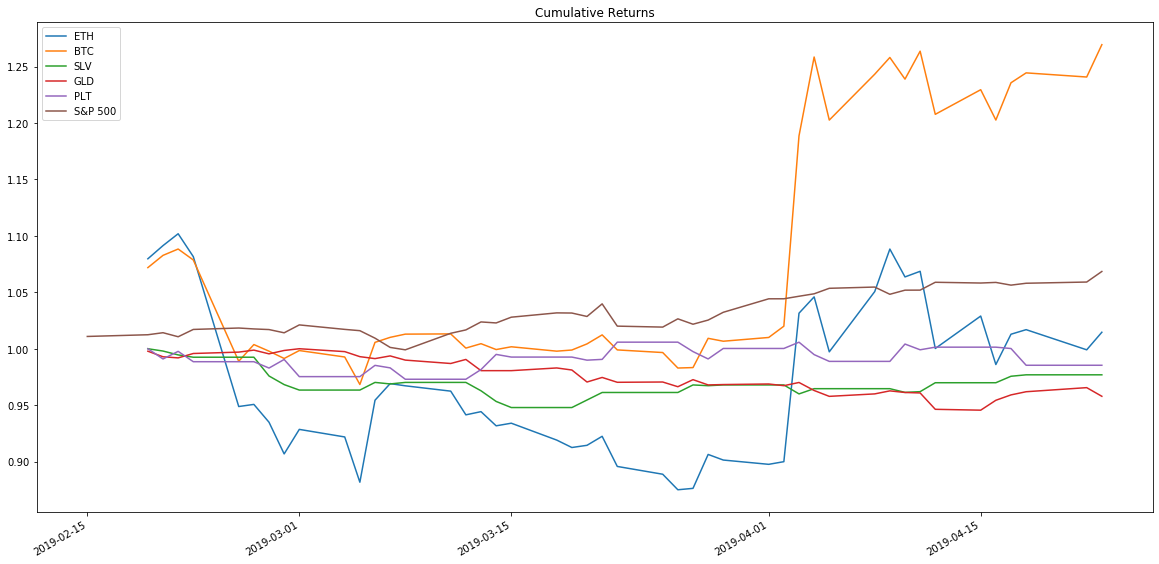

In [74]:
cumulative_returns =(1 + sp500_currency_portfolio).cumprod()
cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns')

In [75]:
#Compare the standard deviations of the entire portfolio to the S&P 500.
#Ethereum, Bitcoin and Platinum are the only ones that have a higher risk than the market as a whole.

sp500_risk = sp500_currency_portfolio["S&P 500"].std()
sp500_currency_portfolio.std() > sp500_risk

ETH         True
BTC         True
SLV        False
GLD        False
PLT         True
S&P 500    False
dtype: bool

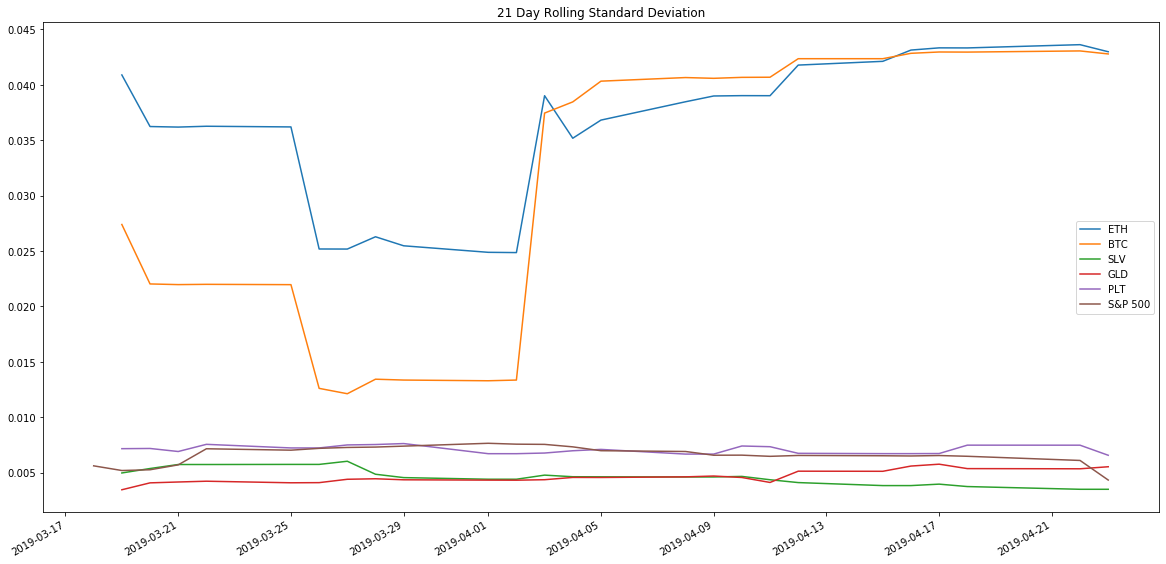

In [76]:
#Calculate and plot the rolling standard deviation for the S&P 500 using a 21 day window
#It is easy to see that digital currency proves to be be much riskier than Gold, Platinum, and Silver
sp500_currency_portfolio.rolling(window=21).std().plot(figsize=(20, 10), title='21 Day Rolling Standard Deviation')

In [77]:
#Annualize Sharpe Ratios
#Gold, Silver, and Platinum do not compensate for the level of risk that they take.
#The only stock to come close to outperforming the benchmark is Bitcoin. Ethereum is Positive as well.
sharpe_ratios = (sp500_currency_portfolio.mean() * 252) / (sp500_currency_portfolio.std() * np.sqrt(252))
sharpe_ratios

ETH        0.437152
BTC        2.678538
SLV       -1.719231
GLD       -3.168612
PLT       -0.690410
S&P 500    3.950868
dtype: float64

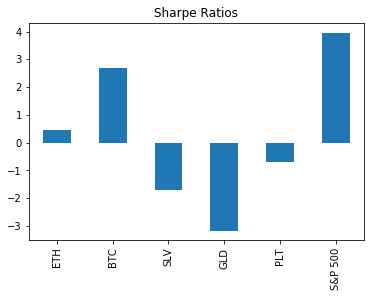

In [78]:
#Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")